In [3]:
import math
import random
import matplotlib.pyplot as plt
from random import shuffle

In [4]:
def error(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + math.pow(d[i][1]-m*d[i][0]-c,2)
  return 0.5*sum/len(d)

In [5]:
def gradm(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)*d[i][0]
  return -1*sum/len(d)


In [6]:
def gradc(d,m,c):
  sum = 0
  for i in range(len(d)):
    sum = sum + (d[i][1]-m*d[i][0]-c)
  return -1*sum/len(d)

In [7]:
x = [0.2,0.4,0.6,0.8,1.0,1.2]
y = [3.4,3.8,4.2,4.6,5.0,5.4]
print("sample x values : ", x)
print("sample y values : ", y)

data = [(x[i],y[i]) for i in range(0,6)]

m = 1
c = -1
print("initial m value : ",m)
print("initial c value : ",c)

learning_rate = 0.01
print("learning rate : ",learning_rate)

batch_size = 2
print("batch size : ",batch_size)

v_m = 0
v_c = 0
print("initial values of vm and vc : ",v_m,v_c)

momentum_coeff = 0.9
print("momentum_coeff : ",momentum_coeff)

print("\nBatch 1")
gradient_m = gradm(data[:2],m,c)
print("gradient of m for batch 1 : ",gradient_m)
gradient_c = gradc(data[:2],m,c)
print("gradient of c for batch 1 : ",gradient_c)
deltam = -1*learning_rate*gradient_m
deltac = -1*learning_rate*gradient_c
print("delta m : ",deltam)
print("delta c : ",deltac)
v_m = v_m*momentum_coeff + deltam
v_c = v_c*momentum_coeff + deltac
print("Velocity of m : ",v_m)
print("Velocity of c : ",v_c)
m = m + v_m
c = c + v_c
print("m : ",m)
print("c : ",c)


print("\nBatch 2")
gradient_m = gradm(data[2:4],m,c)
print("gradient of m for batch 2 : ",gradient_m)
gradient_c = gradc(data[2:4],m,c)
print("gradient of c for batch 2 : ",gradient_c)
deltam = -1*learning_rate*gradient_m
deltac = -1*learning_rate*gradient_c
print("delta m : ",deltam)
print("delta c : ",deltac)
v_m = v_m*momentum_coeff + deltam
v_c = v_c*momentum_coeff + deltac
print("Velocity of m : ",v_m)
print("Velocity of c : ",v_c)
m = m + v_m
c = c + v_c
print("m : ",m)
print("c : ",c)


sample x values :  [0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
sample y values :  [3.4, 3.8, 4.2, 4.6, 5.0, 5.4]
initial m value :  1
initial c value :  -1
learning rate :  0.01
batch size :  2
initial values of vm and vc :  0 0
momentum_coeff :  0.9

Batch 1
gradient of m for batch 1 :  -1.3
gradient of c for batch 1 :  -4.3
delta m :  0.013000000000000001
delta c :  0.043
Velocity of m :  0.013000000000000001
Velocity of c :  0.043
m :  1.013
c :  -0.957

Batch 2
gradient of m for batch 2 :  -3.2634
gradient of c for batch 2 :  -4.6479
delta m :  0.032633999999999996
delta c :  0.046479
Velocity of m :  0.044334
Velocity of c :  0.085179
m :  1.057334
c :  -0.871821


In [8]:
number_of_samples = 6
learning_rate = 0.1
epochs = 100
batch_size = 2
m = -1
c = 1

v_m = 0
v_c = 0
momentum_coeff = 0.9
number_of_batches = number_of_samples//batch_size


In [9]:
x = [0.2,0.4,0.6,0.8,1.0,1.2]
y = [3.4,3.8,4.2,4.6,5.0,5.4]

data = list()

for i in range(6):
  data.append((x[i],y[i]))

print(data)

[(0.2, 3.4), (0.4, 3.8), (0.6, 4.2), (0.8, 4.6), (1.0, 5.0), (1.2, 5.4)]


In [11]:
error_list = []
for i in range(epochs):
  for j in range(number_of_batches):
    if j == number_of_batches:
      d = data[j*batch_size:]
    else:
      d = data[j*batch_size:(j+1)*batch_size]
    deltam = -1*learning_rate*gradm(d,m,c)
    deltac = -1*learning_rate*gradc(d,m,c)

    v_m = v_m*momentum_coeff + deltam
    v_c = v_c*momentum_coeff + deltac

    m = m + v_m
    c = c + v_c
    
    error_list.append(error(d,m,c))
  random.shuffle(data)

Text(0.5, 1.0, 'error graph in case of Mini Batch GD')

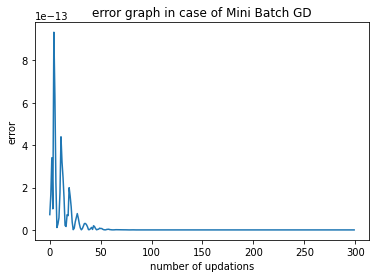

In [12]:
x1 = range(epochs*(number_of_batches))
y1 = error_list

plt.plot(x1,y1)
plt.xlabel("number of updations")
plt.ylabel("error")
plt.title("error graph in case of Mini Batch GD")


Text(0.5, 1.0, 'line which is generated after training')

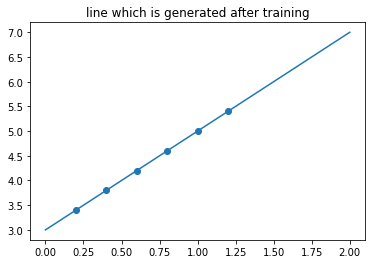

In [13]:
x2 = range(0,3)
y2 = [m*i+c for i in x2]

plt.plot(x2,y2)
plt.scatter(x,y)
plt.title("line which is generated after training")

In [14]:
print("optimal value of m, c :",m,c)

optimal value of m, c : 1.9999999999998574 3.000000000000342
